# Waste Management using CNN model


In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
from cv2 import cvtColor

x_data= []
y_data= []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array= cv2.imread(file)
        img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [01:14<00:00, 133.80it/s]


In [8]:
data.shape

(22564, 2)

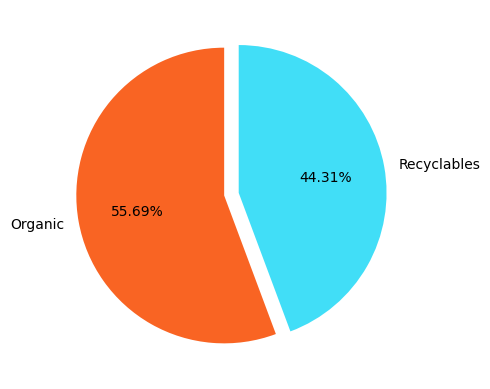

In [9]:
colors=['#f96423', '#41def7']
plt.pie(data.label.value_counts(), labels= ['Organic','Recyclables'], autopct= '%0.2f%%', colors= colors , startangle=90, explode=[0.05, 0.05])
plt.show()

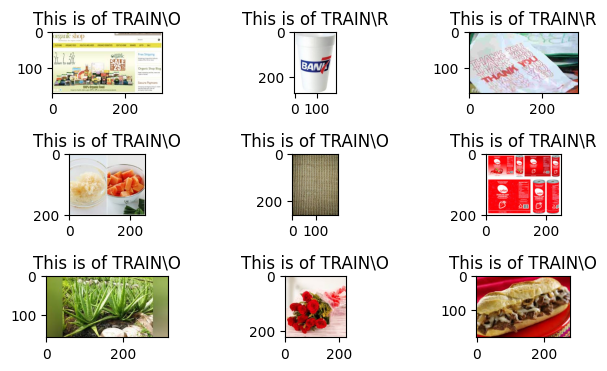

In [11]:
plt.Figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index= np.random.randint(20000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()


# CNN- Convolutional Neural Network
 

In [11]:
model= Sequential()
model.add(Conv2D(32,(3,3), input_shape= (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))


model.compile(loss = "binary_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"])
batch_size= 256



In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
train_datagen= ImageDataGenerator(rescale= 1./255 )


In [15]:
test_datagen=  ImageDataGenerator(rescale= 1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode = "categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [20]:
hist = model.fit(
    train_generator, 
    epochs= 10,
    validation_data = test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 722s 8s/step - accuracy: 0.7172 - loss: 0.6492 - val_accuracy: 0.8587 - val_loss: 0.3535
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.8286 - loss: 0.4286 - val_accuracy: 0.8691 - val_loss: 0.3307
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 317s 4s/step - accuracy: 0.8437 - loss: 0.3811 - val_accuracy: 0.8786 - val_loss: 0.3016
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 501s 6s/step - accuracy: 0.8636 - loss: 0.3408 - val_accuracy: 0.8512 - val_loss: 0.3427
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.8754 - loss: 0.3176 - val_accuracy: 0.9021 - val_loss: 0.2595
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.8848 - loss: 0.2935 - val_accuracy: 0.9029 - val_loss: 0.2768
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step - accuracy: 0.8927 - loss: 0.2767 - val_accuracy: 0.9057 - val_loss: 0.2494
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.9025 - loss: 0.2463 - val_accuracy: 0.8969 - v